<a href="https://colab.research.google.com/github/tikendraw/Deeplearning/blob/main/CIFAR10_dataset_classification_with_convolutional__neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas  as pd
import os
from tensorflow.keras.datasets import cifar10

# Loading the data

In [2]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
xtrain.shape, ytrain.shape, xtest.shape,ytest.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## normalize the data

In [4]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255
ytrain = ytrain.astype('float32')
ytest = ytest.astype('float32')

In [5]:
xtrain[1]

array([[[0.6039216 , 0.69411767, 0.73333335],
        [0.49411765, 0.5372549 , 0.53333336],
        [0.4117647 , 0.40784314, 0.37254903],
        ...,
        [0.35686275, 0.37254903, 0.2784314 ],
        [0.34117648, 0.3529412 , 0.2784314 ],
        [0.30980393, 0.31764707, 0.27450982]],

       [[0.54901963, 0.627451  , 0.6627451 ],
        [0.5686275 , 0.6       , 0.6039216 ],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.3764706 , 0.3882353 , 0.30588236],
        [0.3019608 , 0.3137255 , 0.24313726],
        [0.2784314 , 0.28627452, 0.23921569]],

       [[0.54901963, 0.60784316, 0.6431373 ],
        [0.54509807, 0.57254905, 0.58431375],
        [0.4509804 , 0.4509804 , 0.4392157 ],
        ...,
        [0.30980393, 0.32156864, 0.2509804 ],
        [0.26666668, 0.27450982, 0.21568628],
        [0.2627451 , 0.27058825, 0.21568628]],

       ...,

       [[0.6862745 , 0.654902  , 0.6509804 ],
        [0.6117647 , 0.6039216 , 0.627451  ],
        [0.6039216 , 0

In [6]:
ytrain[:]

array([[6.],
       [9.],
       [9.],
       ...,
       [9.],
       [1.],
       [1.]], dtype=float32)

# Build the model

In [7]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (32,32,3),name = 'flat'))
model.add(keras.layers.Dense(32,activation='relu',name = 'first'))
model.add(keras.layers.Dense(16,activation='relu',name = 'second'))
model.add(keras.layers.Dense(10,activation='softmax',name = 'output'))

model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.Adagrad(),
              metrics = ['accuracy'])

history = model.fit(xtrain,ytrain,epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 7s 3ms/step - loss: 2.1586 - accuracy: 0.2077
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0232 - accuracy: 0.2785
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9579 - accuracy: 0.3075
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9220 - accuracy: 0.3219
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8983 - accuracy: 0.3309
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8812 - accuracy: 0.3359
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8677 - accuracy: 0.3399
Epoch 8/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8566 - accuracy: 0.3446
Epoch 9/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8468 - accuracy: 0.3485
Epoch 10/100
1563/1563 [==============================] - 5s 3ms/step - l

In [8]:
classes = ['airplane'										
,'automobile'										
,'bird'										
,'cat'										
,'deer'										
,'dog'										
,'frog'										
,'horse'										
,'ship'										
,'truck']

In [9]:
pred = model.predict(xtest)

In [10]:
tf.argmax(pred[4])

<tf.Tensor: shape=(), dtype=int64, numpy=4>

In [11]:
ytest[4]

array([6.], dtype=float32)

In [12]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 1.6324 - accuracy: 0.4273


[1.632371425628662, 0.42730000615119934]

# Building the model with convolutional network

In [14]:
conv_model = keras.Sequential([
                               keras.Input(shape=(32,32,3))
                               ,keras.layers.Conv2D(32,2,activation='relu'),
                               keras.layers.MaxPooling2D(pool_size=(2,2)),
                               keras.layers.Conv2D(32,3,activation = 'relu'),
                              # keras.layers.MaxPooling2D(),
                              # keras.layers.Conv2D(32,3,activation = 'relu'),
                               keras.layers.Flatten(),
                               keras.layers.Dense(32,activation = 'relu'),
                               keras.layers.Dense(10,activation='softmax')
])

conv_model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = conv_model.fit(xtrain,ytrain,epochs = 100)


1563/1563 [==============================] - 9s 6ms/step - loss: 0.1033 - accuracy: 0.9644
Epoch 99/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0934 - accuracy: 0.9679
Epoch 100/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0947 - accuracy: 0.9669


In [16]:
conv_model.evaluate(xtest,ytest)

313/313 [==============================] - 2s 4ms/step - loss: 5.2262 - accuracy: 0.6024


[5.226228713989258, 0.602400004863739]

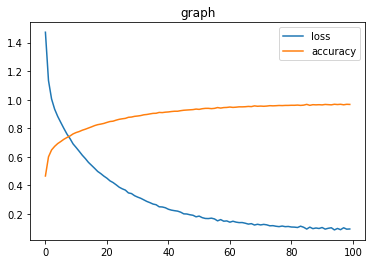

In [15]:
pd.DataFrame(history.history).plot(title = 'graph')